In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Load your dataset
df = pd.read_excel("/content/drive/MyDrive/Mall Customers.xlsx")

In [4]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [5]:
# Select relevant features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [6]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    labels = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        labels.append(np.argmin(distances))
    return np.array(labels)

def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i]
        centroids[i] = cluster_points.mean(axis=0)
    return centroids

def kmeans_scratch(X, k=3, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids


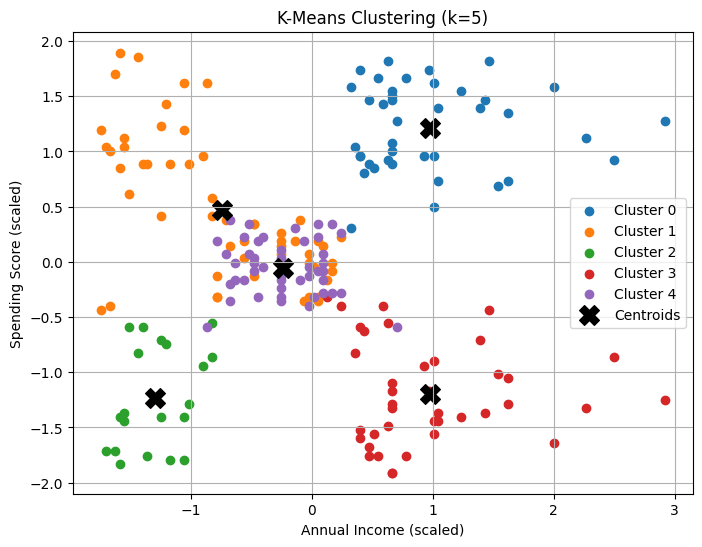

In [13]:
# Run the algorithm
k = 5  # try different values (2–6) to experiment
clusters, centroids = kmeans(X_scaled, k)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_scaled[clusters == i, 1], X_scaled[clusters == i, 2], label=f"Cluster {i}")

plt.scatter(centroids[:, 1], centroids[:, 2], color='black', marker='X', s=200, label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
labels, centroids = kmeans_scratch(X_scaled, k=5)

In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

sil_score = silhouette_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.4f}")

Silhouette Score: 0.4166
Davies-Bouldin Index: 0.8746
Calinski-Harabasz Index: 125.1009
